# Deep Learning Approach 

There are 2 significant parts of data.
- Shop details
- Past foot traffic

As part of Deep Learning approach, we will:
- Fit a model for foot traffic
- Cluster data to generate extra features to overcome issues of Sparse data
- Fit a model to improve accuracy by utilizing Shop details

# Milestones:

- Neural Network - 2 layer, with 15 inputs and 1 output
- Neural Network - 2 layer, with 15 inputs and 15 output
- Neural Network - 3 layer, with 15 inputs, 30 hidden nodes and 15 outputs
- Convolutional Network - Cluster similar stores and generate new hidden features. We will be refering to research paper [Clustering using Convolution](https://arxiv.org/abs/1511.06241 "arXiv:1511.06241v2")
- LSTM Network to better learn patterns in foot traffic
- Create a Deep Learning architecture using the learnings from above Networks.

# Milestone 1:

## Reshaping Data
In order to create a model in machine learning, we need to have inputs and ouputs. However, if we are trying to machine learn daily foot traffic, we will have to divide it in inputs/ouputs. Assuming, we will feed 15 days of data to predict next 15 days, we need to have a 2 matrix of [nx15]. 

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from pandas.tools.plotting import autocorrelation_plot
matplotlib.style.use('ggplot')
pd.set_option("display.max_rows",10)
plt.rcParams["figure.figsize"]  = [10,7] # width, height

In [2]:
data = pd.read_pickle("cff_15dayperiod.pkl")
data.shape

(5467, 31)

In [3]:
data

shop_id input_foot_traffic                                            \
day                           0      1      2      3      4      5      6   
0          1              268.0  218.0  224.0  260.0  267.0  243.0  272.0   
1          1              225.0  264.0  233.0  424.0  419.0  539.0  267.0   
2          1              257.0  272.0  267.0  310.0  261.0  253.0  266.0   
3          1              304.0  320.0  419.0  397.0  393.0  349.0  393.0   
4          1              337.0  238.0  352.0  339.0  356.0  230.0  254.0   
...      ...                ...    ...    ...    ...    ...    ...    ...   
5462    2000              124.0  134.0  153.0  102.0  143.0   43.0   39.0   
5463    2000              216.0  169.0  184.0  161.0   53.0   76.0  177.0   
5464    2000               31.0   51.0   52.0  162.0  166.0  170.0  160.0   
5465    2000              159.0   43.0   43.0   53.0   37.0   38.0   80.0   
5466    2000               87.0   64.0  179.0  175.0  178.0  200.0  151.0   

                    ...   output_foot_traffic                              \
day       7      8  ...                     5      6      7      8      9   
0     320.0  262.0  ...                 272.0  320.0  262.0  275.0  297.0   
1     282.0  302.0  ...                 267.0  282.0  302.0  343.0  265.0   
2     281.0  272.0  ...                 266.0  281.0  272.0  288.0  353.0   
3     364.0  317.0  ...                 393.0  364.0  317.0  383.0  364.0   
4     226.0  242.0  ...                 254.0  226.0  242.0  272.0  297.0   
...     ...    ...  ...                   ...    ...    ...    ...    ...   
5462  190.0  131.0  ...                  39.0  190.0  131.0  185.0  207.0   
5463  195.0  187.0  ...                 177.0  195.0  187.0  168.0  171.0   
5464  187.0  142.0  ...                 160.0  187.0  142.0   53.0   70.0   
5465   79.0  174.0  ...                  80.0   79.0  174.0  200.0  196.0   
5466   72.0   63.0  ...                 151.0   72.0   63.0  181.0  195.0   

                                         
day      10     11     12     13     14  
0     243.0  220.0  237.0  265.0  288.0  
1     284.0  273.0  294.0  285.0  257.0  
2     322.0  332.0  302.0  296.0  304.0  
3     337.0  296.0  312.0  339.0  337.0  
4     258.0  250.0  254.0  194.0  206.0  
...     ...    ...    ...    ...    ...  
5462  163.0   80.0   63.0  188.0  216.0  
5463   98.0  130.0  259.0  212.0  210.0  
5464  162.0  182.0  138.0  127.0  159.0  
5465  187.0  192.0  212.0  162.0   87.0  
5466  197.0  148.0  145.0   78.0   70.0  

[5467 rows x 31 columns]

## Splitting the data into training, testing, and validation sets


In [4]:
X = data.loc[:,'input_foot_traffic']
y = data.loc[:,'output_foot_traffic']

In [5]:
X

day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,268.0,218.0,224.0,260.0,267.0,243.0,272.0,320.0,262.0,275.0,297.0,243.0,220.0,237.0,265.0
1,225.0,264.0,233.0,424.0,419.0,539.0,267.0,282.0,302.0,343.0,265.0,284.0,273.0,294.0,285.0
2,257.0,272.0,267.0,310.0,261.0,253.0,266.0,281.0,272.0,288.0,353.0,322.0,332.0,302.0,296.0
3,304.0,320.0,419.0,397.0,393.0,349.0,393.0,364.0,317.0,383.0,364.0,337.0,296.0,312.0,339.0
4,337.0,238.0,352.0,339.0,356.0,230.0,254.0,226.0,242.0,272.0,297.0,258.0,250.0,254.0,194.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5462,124.0,134.0,153.0,102.0,143.0,43.0,39.0,190.0,131.0,185.0,207.0,163.0,80.0,63.0,188.0
5463,216.0,169.0,184.0,161.0,53.0,76.0,177.0,195.0,187.0,168.0,171.0,98.0,130.0,259.0,212.0
5464,31.0,51.0,52.0,162.0,166.0,170.0,160.0,187.0,142.0,53.0,70.0,162.0,182.0,138.0,127.0
5465,159.0,43.0,43.0,53.0,37.0,38.0,80.0,79.0,174.0,200.0,196.0,187.0,192.0,212.0,162.0


In [6]:
y

day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,218.0,224.0,260.0,267.0,243.0,272.0,320.0,262.0,275.0,297.0,243.0,220.0,237.0,265.0,288.0
1,264.0,233.0,424.0,419.0,539.0,267.0,282.0,302.0,343.0,265.0,284.0,273.0,294.0,285.0,257.0
2,272.0,267.0,310.0,261.0,253.0,266.0,281.0,272.0,288.0,353.0,322.0,332.0,302.0,296.0,304.0
3,320.0,419.0,397.0,393.0,349.0,393.0,364.0,317.0,383.0,364.0,337.0,296.0,312.0,339.0,337.0
4,238.0,352.0,339.0,356.0,230.0,254.0,226.0,242.0,272.0,297.0,258.0,250.0,254.0,194.0,206.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5462,134.0,153.0,102.0,143.0,43.0,39.0,190.0,131.0,185.0,207.0,163.0,80.0,63.0,188.0,216.0
5463,169.0,184.0,161.0,53.0,76.0,177.0,195.0,187.0,168.0,171.0,98.0,130.0,259.0,212.0,210.0
5464,51.0,52.0,162.0,166.0,170.0,160.0,187.0,142.0,53.0,70.0,162.0,182.0,138.0,127.0,159.0
5465,43.0,43.0,53.0,37.0,38.0,80.0,79.0,174.0,200.0,196.0,187.0,192.0,212.0,162.0,87.0


In [7]:
train_count = int(X.shape[0] * 0.25)

In [8]:
X_train = X[train_count:]

## Visualize 15 days data

Let's see if there is any observable pattern for 15 days of data between stores 

X_train.plot()

In [9]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
    
def fetch_data():
    n = StandardScaler()
    
    norm = n.fit_transform(np.hstack((X.values, y.iloc[:,0:output_nodes_num].values)) )
    
    X_norm = norm[:,:-1]
    y_norm = norm[:,-1][:,None ]
    
    X_train, X_valid, y_train, y_valid = train_test_split(
    X_norm, y_norm , test_size=0.25, random_state=42)
    
    return X_train, X_valid, y_train, y_valid

## Network Model

Our model consists of:
- 15 input nodes and 1 output node
- SSE is used to calculate the cost


In [10]:
import tensorflow as tf
sess = tf.InteractiveSession()


In [11]:

input_nodes_num = 15
output_nodes_num = 1

tf_x = tf.placeholder(tf.float32, [None, input_nodes_num],name='Inputs')
tf_y_ = tf.placeholder(tf.float32, [None, output_nodes_num], name='ActualOutput')

tf_W = tf.Variable(tf.truncated_normal([input_nodes_num, output_nodes_num]),name='Weights')

tf_b = tf.Variable(tf.zeros([output_nodes_num]),name='bias')

tf_y = tf.add(tf.matmul(tf_x, tf_W), tf_b)

tf_y_predict_ = tf.add(tf.matmul(tf_x, tf_W), tf_b)

sq_diff = 0.5 * tf.reduce_sum(tf.squared_difference( tf_y_ , tf_y), name = "Squared_Difference") / 200
sq_diff_valid = 0.5 * tf.reduce_sum(tf.squared_difference( tf_y_predict_ , tf_y), name = "Squared_Difference") / 200

train_step = tf.train.GradientDescentOptimizer(0.01).minimize(sq_diff)


In [12]:
X_train, X_valid, y_train, y_valid = fetch_data()

In [13]:
X_valid.shape

(1367, 15)

In [14]:
y_valid.shape

(1367, 1)

## Training the Network

- Network will be trained using Stochastic Gradient Descent.
- Learning rate is 0.01
- Epochs: 1000


Training (part of dataset) - epoch:0, loss:2.2048230171203613
Training (whole dataset) - epoch:0, loss:35.02613830566406
Validation - epoch:0, loss:13.373302459716797
****
Training (part of dataset) - epoch:200, loss:0.5199421048164368
Training (whole dataset) - epoch:200, loss:10.838671684265137
Validation - epoch:200, loss:4.559688568115234
****
Training (part of dataset) - epoch:400, loss:0.22027510404586792
Training (whole dataset) - epoch:400, loss:6.259888172149658
Validation - epoch:400, loss:3.0919711589813232
****
Training (part of dataset) - epoch:600, loss:0.23689179122447968
Training (whole dataset) - epoch:600, loss:4.487082004547119
Validation - epoch:600, loss:2.397934675216675
****
Training (part of dataset) - epoch:800, loss:0.23053142428398132
Training (whole dataset) - epoch:800, loss:3.33243989944458
Validation - epoch:800, loss:1.838524341583252
****
Training (part of dataset) - epoch:1000, loss:0.07883421331644058
Training (whole dataset) - epoch:1000, loss:2.6663

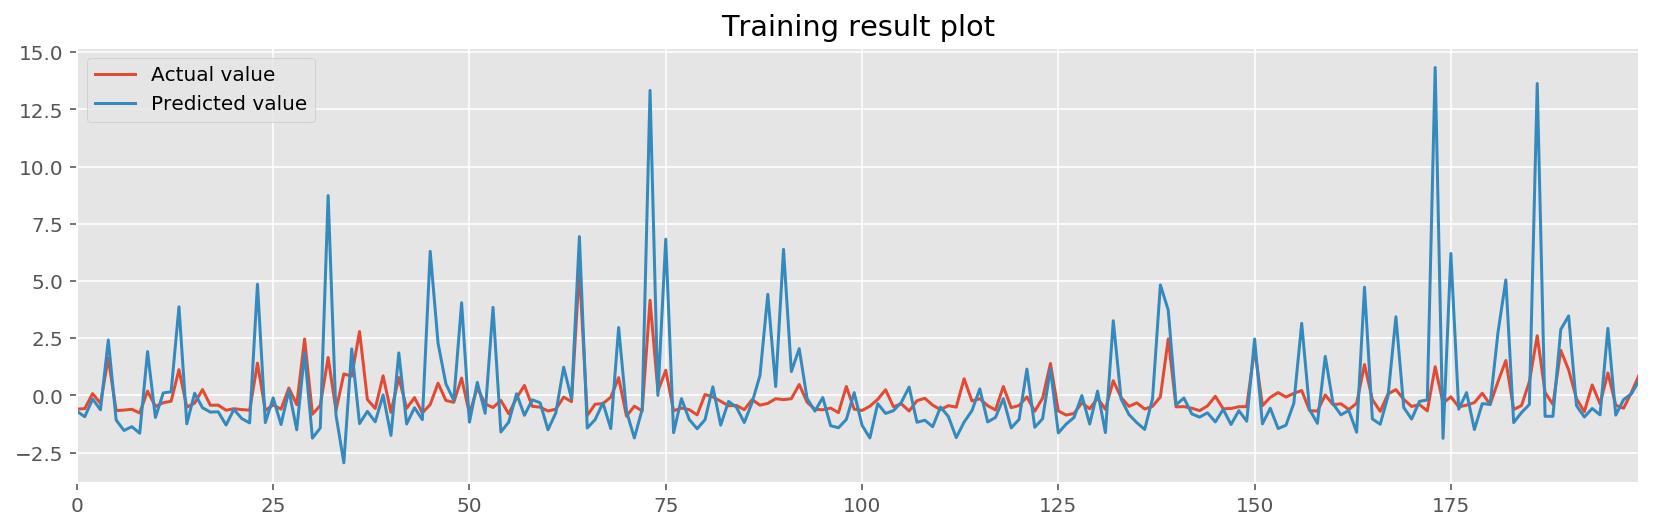

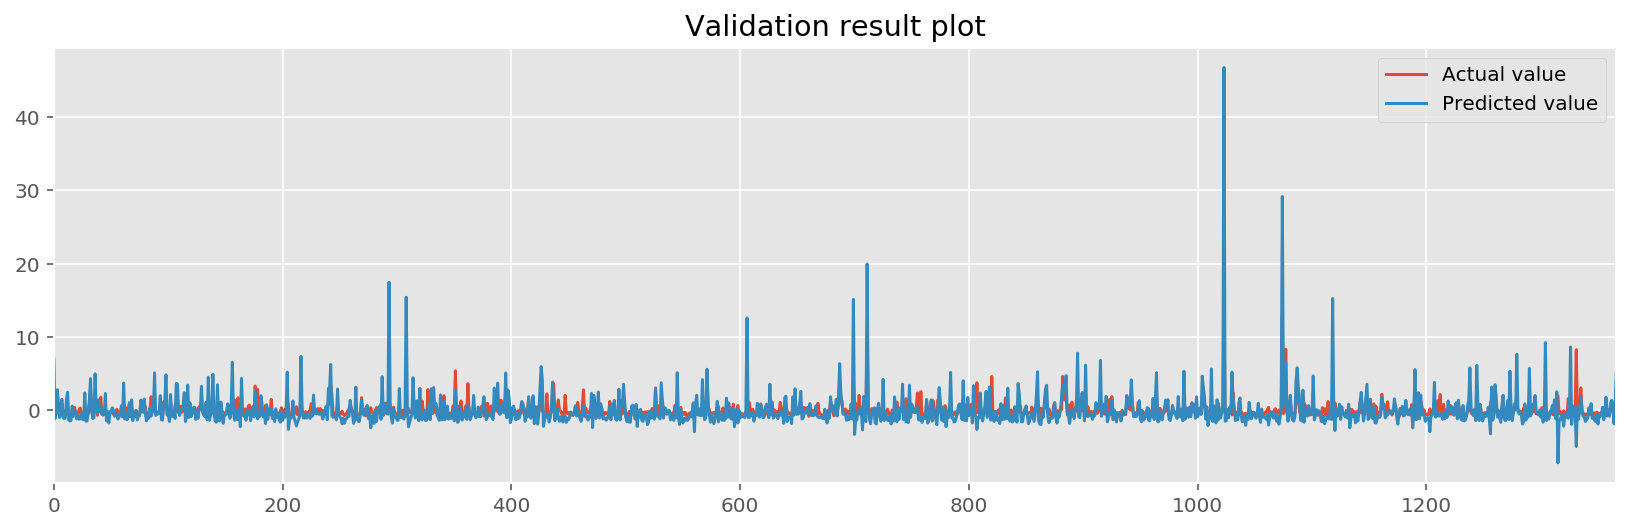

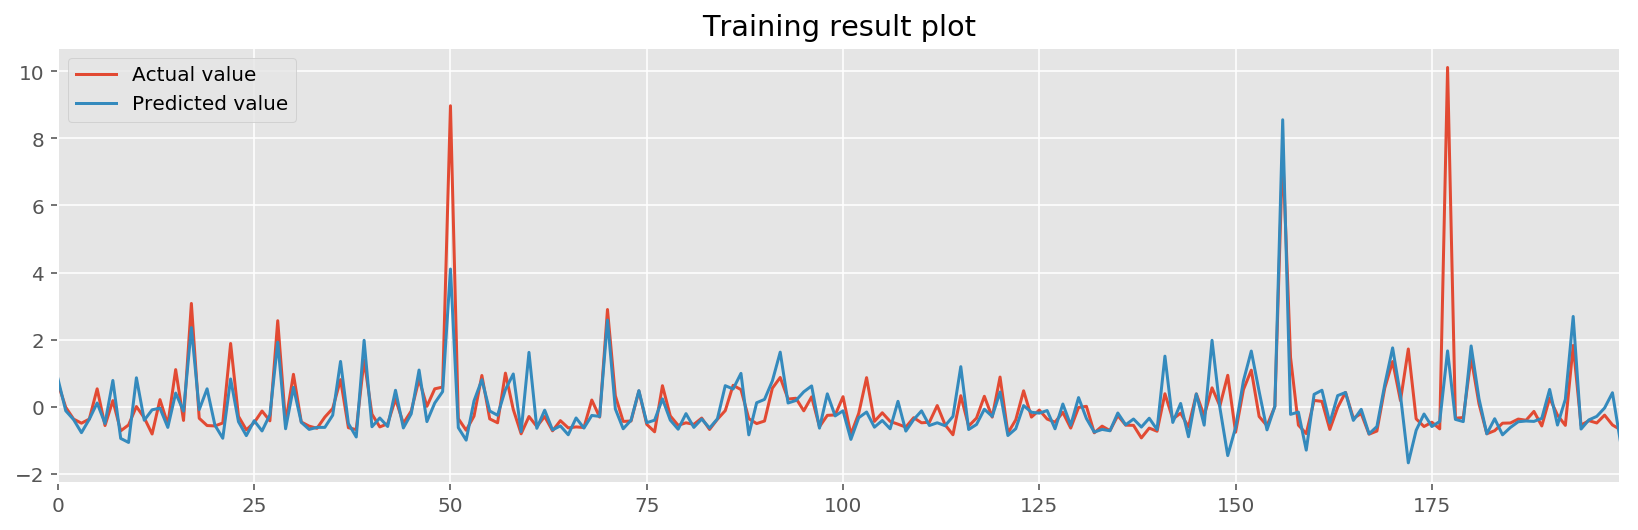

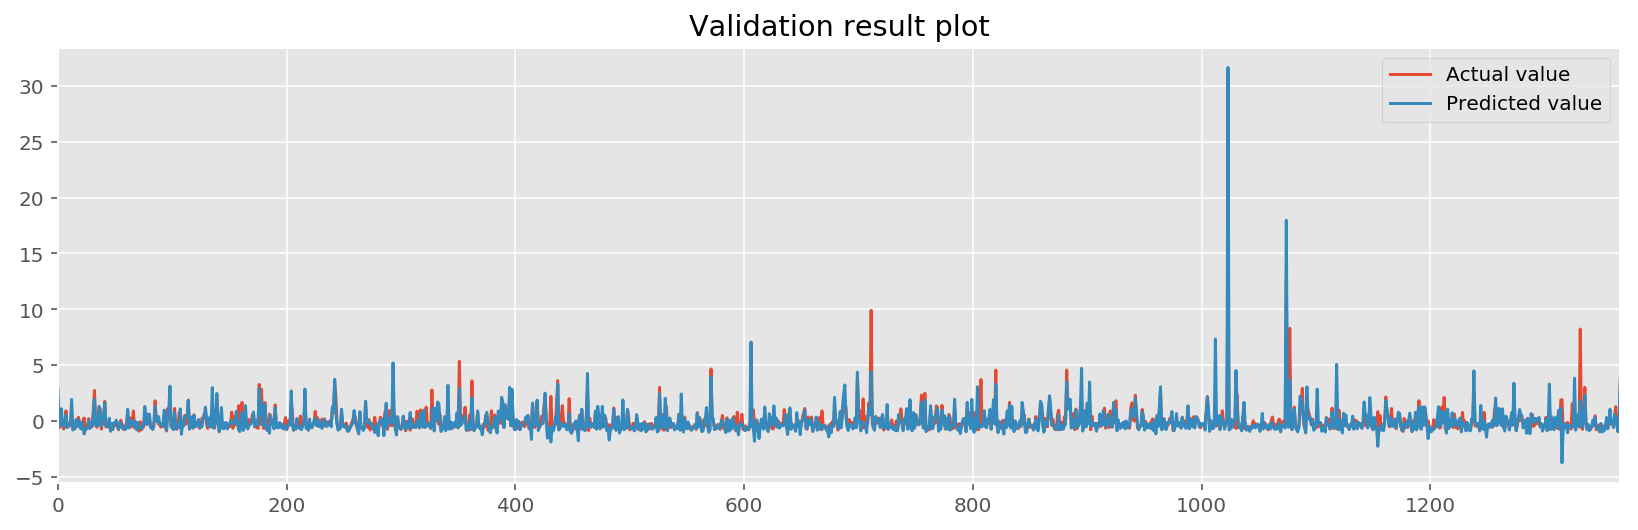

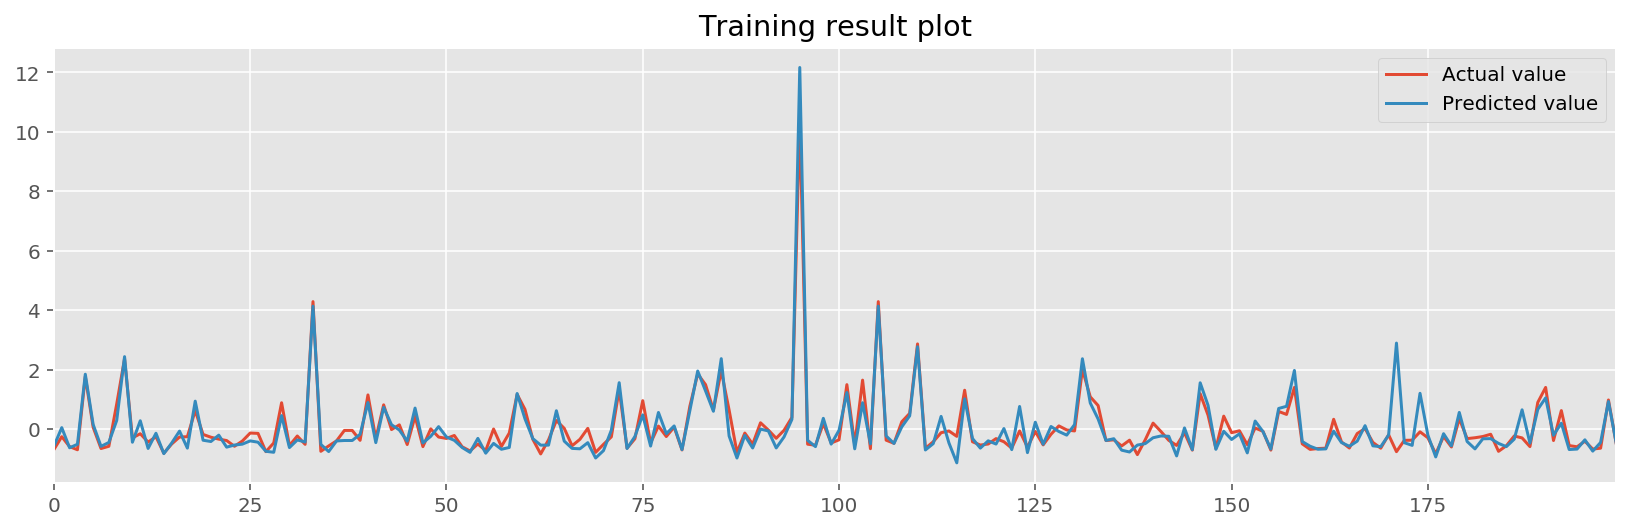

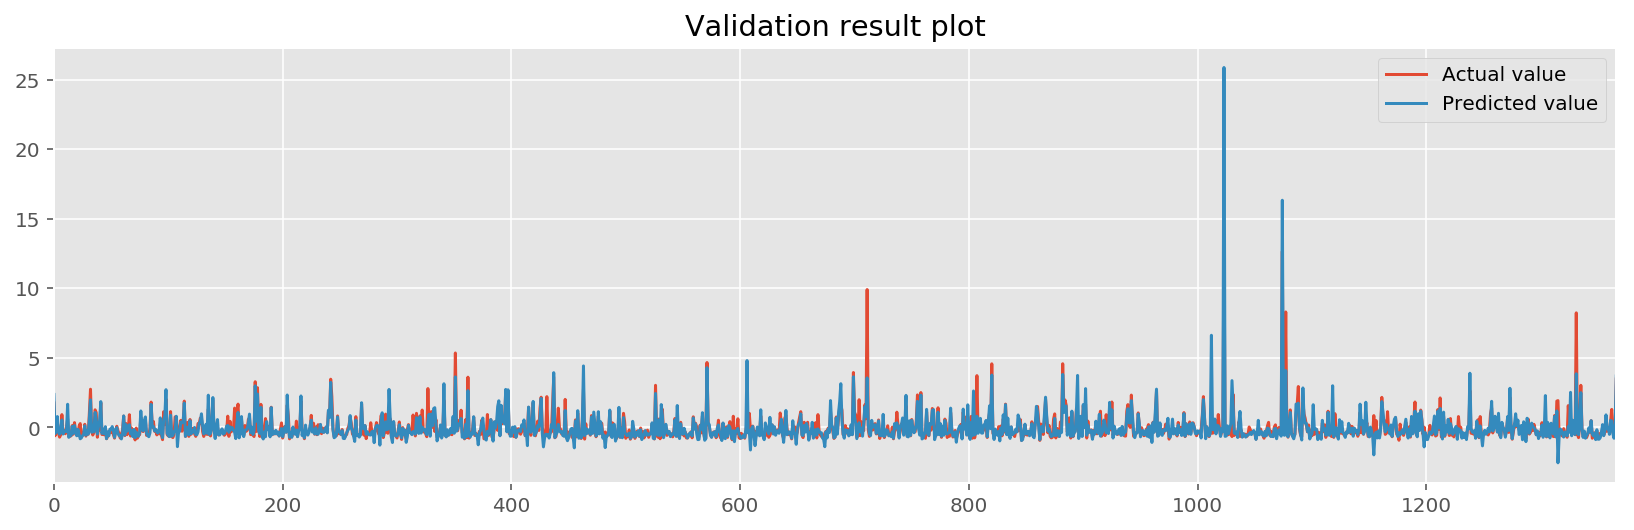

In [15]:
tf.initialize_all_variables().run()

losses = {'train':[], 'validation':[]}

for i in range(1001):
    index = np.random.randint(size=200,low = 0, high = X_train.shape[0])
    batch_xs = X_train[index,:]
    batch_ys = y_train[index,:]
    _, tr_y, tr_sq_diff = sess.run([train_step, tf_y, sq_diff], feed_dict={tf_x: batch_xs, tf_y_:batch_ys })
    
    tv_y = tf_y_predict_.eval(feed_dict={tf_x: X_valid})
    vd_sq_diff = sq_diff_valid.eval(feed_dict={tf_x: X_valid, tf_y:y_valid})
    
    
    if i % 200 == 0:
        print ("Training (part of dataset) - epoch:{}, loss:{}".format(i, tr_sq_diff))
        tr_sq_diff = sess.run(sq_diff, feed_dict={tf_x: X_train, tf_y_: y_train})
        print ("Training (whole dataset) - epoch:{}, loss:{}".format(i, tr_sq_diff))
        
        losses['train'].append(tr_sq_diff)
        losses['validation'].append(vd_sq_diff)
        
        print("Validation - epoch:{}, loss:{}".format(i, vd_sq_diff))
        print("****")

    if i % 500 == 0:

        answer_train = pd.DataFrame({"Predicted value":tr_y[:,0], "Actual value":batch_ys[:,0]})
        answer_train.plot(title='Training result plot', figsize=[14,4])

        answer_valid = pd.DataFrame({"Predicted value":tv_y[:,0], "Actual value":y_valid[:,0]})
        answer_valid.plot(title = 'Validation result plot', figsize=[14,4])

### Plotting Loss

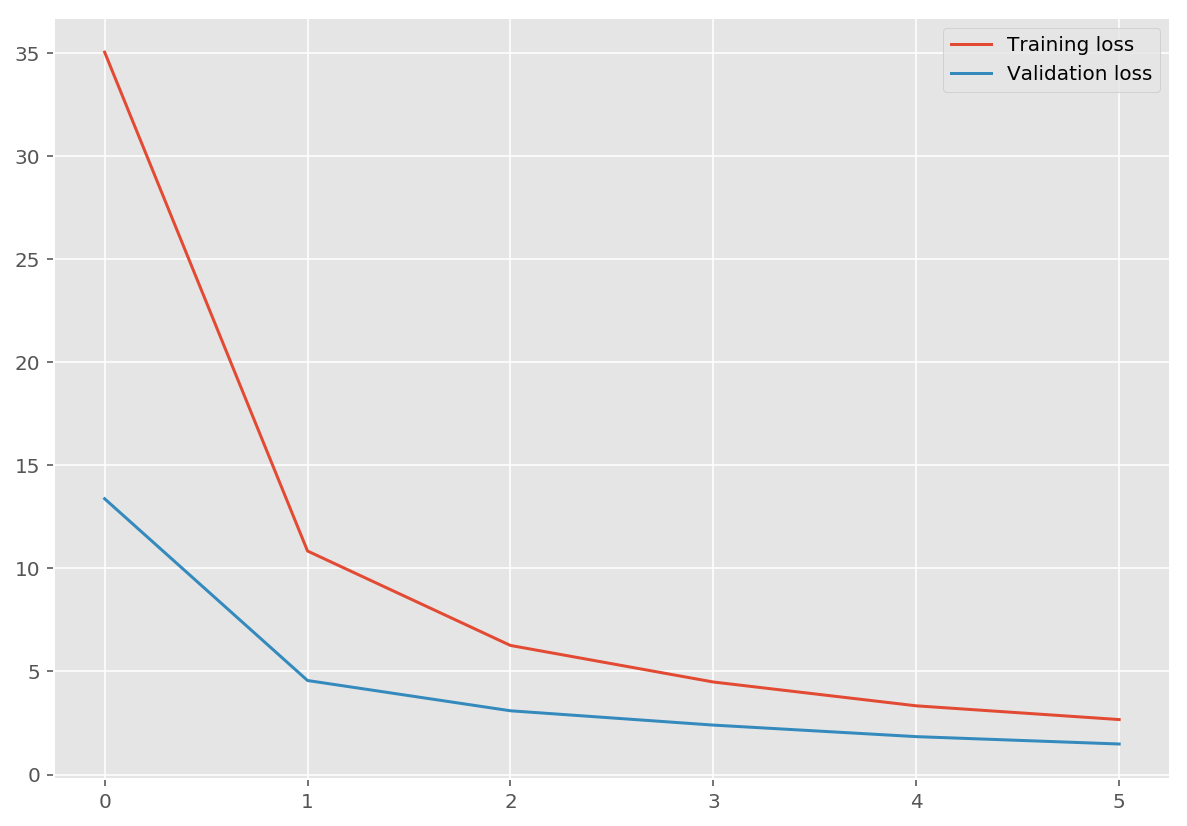

In [16]:
plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()
#plt.ylim(ymax=0.5)